In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [8]:
import os

In [4]:
file='matches.csv'
deliver='deliveries.csv'
my_colors = 'red','blue','green','yellow','purple','violet','black','cyan', 'magenta'

In [5]:
df=pd.read_csv(file)
df.head()
dp=pd.read_csv(deliver)
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [377]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [378]:
#total matches played during 2013-2017
df.shape

(636, 18)

In [379]:
#all columns of matches file
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [380]:
#checking if any null values 
df.isnull().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [381]:
#total missing values of respective columns
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [382]:
#we see umpire3 has missing so many attribute, it is not usefull for u with missing attribute, so i am droppin that column
df.drop(['umpire3'],axis=1, inplace=True)

In [383]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [384]:
dp.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [386]:
dp.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [387]:
dp.shape

(150460, 21)

In [388]:
#checking if any null values
df.isnull().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
dtype: bool

In [390]:
dp.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [391]:
#we see player_dismissed, dismissal_kind,fielder colmns missing so many attributes, s i am eliminating thoses colmns
dp.drop(['player_dismissed', 'dismissal_kind', 'fielder'],axis=1, inplace=True)

In [392]:
dp.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


<h1>plotting bargraph of matches per season, on x axis=season,on y axis=matches count<\h1> 

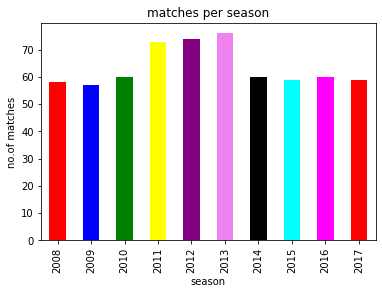

In [345]:
df_total = df.groupby('season')['id'].nunique()
df_total.plot(kind='bar',color=my_colors)
plt.xlabel("season")
plt.ylabel("no.of matches")
plt.title("matches per season")
plt.show()

<h1>PLOTTING BAR GRAPH OF MATCHES WINS BY EACH TEAM IN EVERY SEASON<\H1>

In [394]:
df_tts=df[['id','season','winner']]

In [395]:
#each team wins in every season
df_csk=(df_tts.loc[df['winner'] =="Chennai Super Kings" ]).groupby('season')['id'].nunique()
df_rcb=(df_tts.loc[df['winner'] =="Royal Challengers Bangalore" ]).groupby('season')['id'].nunique()
df_srh=(df_tts.loc[df['winner'] =="Sunrisers Hyderabad" ]).groupby('season')['id'].nunique()
df_rps=(df_tts.loc[df['winner'] =="Rising Pune Supergiant" ]).groupby('season')['id'].nunique()
df_kkr=(df_tts.loc[df['winner'] =="Kolkata Knight Riders" ]).groupby('season')['id'].nunique()
df_kp=(df_tts.loc[df['winner'] =="Kings XI Punjab" ]).groupby('season')['id'].nunique()
df_dd=(df_tts.loc[df['winner'] =="Delhi Daredevils" ]).groupby('season')['id'].nunique()
df_gl=(df_tts.loc[df['winner'] =="Gujarat Lions" ]).groupby('season')['id'].nunique()
df_rr=(df_tts.loc[df['winner'] =="Rajasthan Royals" ]).groupby('season')['id'].nunique()
df_mi=(df_tts.loc[df['winner'] =="Mumbai Indians" ]).groupby('season')['id'].nunique()

In [396]:
from functools import reduce
frames=[df_csk,df_rcb,df_srh,df_rps,df_kkr,df_kp,df_dd,df_gl,df_rr,df_mi]

In [398]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['season'],
                                            how='outer'), frames)
df_merged=df_merged.fillna(0)

df_merged2=df_merged.columns = ['Chennai Super Kings','Royal Challengers Bangalore','Sunrisers Hyderabad',
                     'Rising Pune Supergiant','Kolkata Knight Riders','Kings XI Punjab','Delhi Daredevils','Gujarat Lions','Rajasthan Royals','Mumbai Indians']

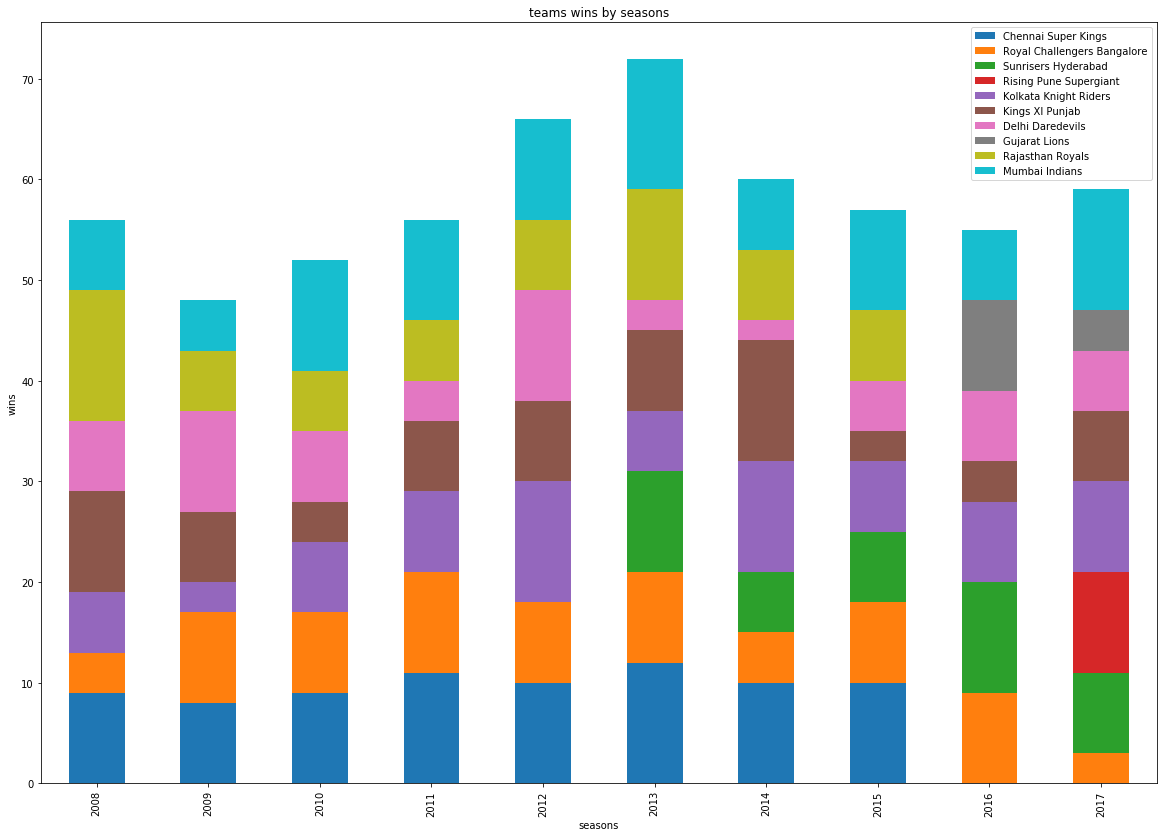

In [29]:
axis = df_merged.plot(kind="bar", stacked=True, figsize=(20,14))
plt.xlabel("seasons")
plt.ylabel("wins")
plt.title("teams wins by seasons")
fig = axis.get_figure()


<h1>EXTRA RUNS GIVEN BY EACH TEAM IN SEASON 2016<\H1>
    <H5>JAI UMESH YADAV 

In [400]:
#MERGING MATCHES FILE AND DELIVERY FILE BY ID, MATCH ID..WE KEED MATCH ID AND DROPING ID INDEX NAME  
runs = df[['id','season']].merge(dp, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

In [401]:
extras=runs[['season','match_id','bowling_team','extra_runs']]
extra=(extras.loc[extras['season'] ==2016 ]).groupby([ 'bowling_team'])['extra_runs'].sum().T

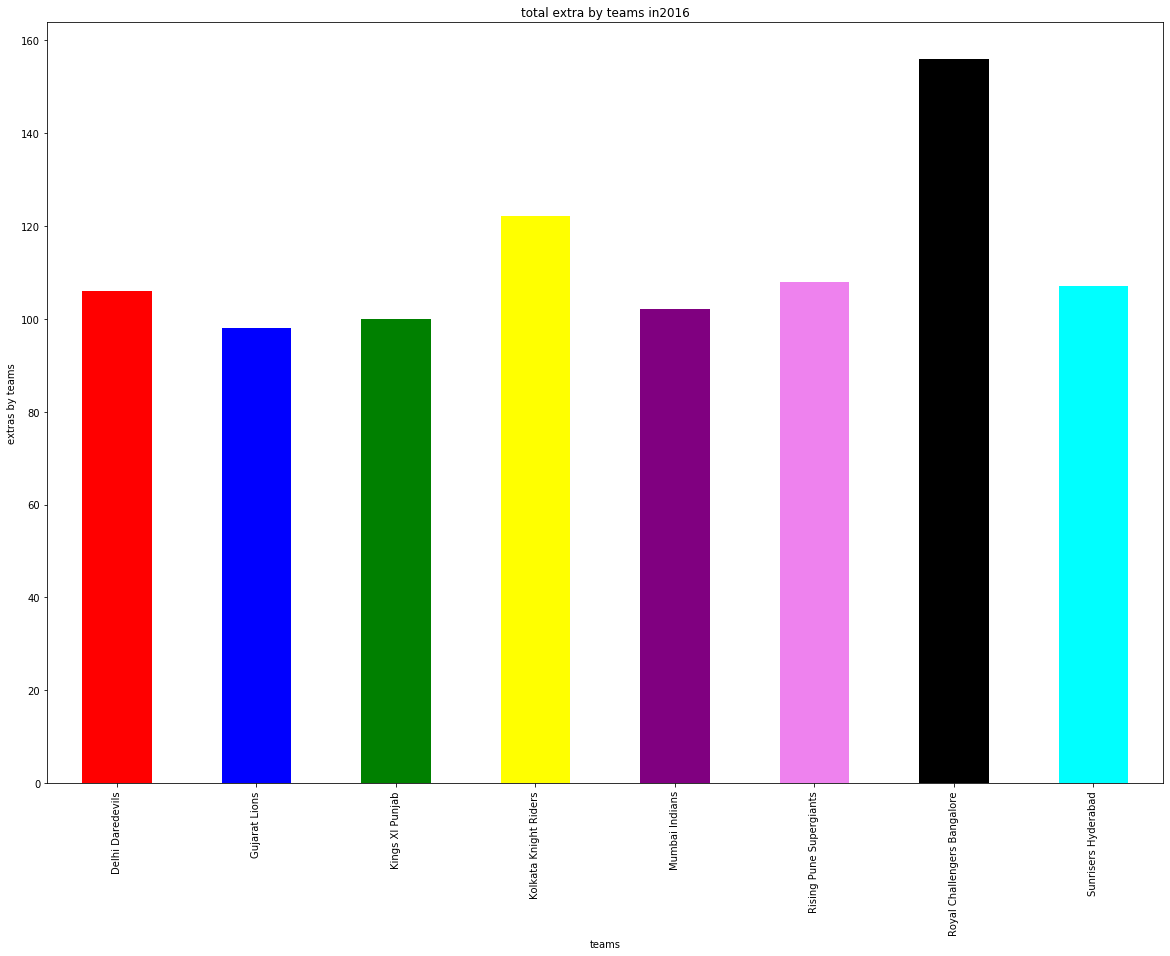

In [403]:
extra.plot(kind='bar',color=my_colors, figsize=(20,14))
plt.xlabel("teams")
plt.ylabel("extras by teams")
plt.title("total extra by teams in2016")
plt.show()

<h1>plotting top 5 economy bowlers of season 2015<\h1>

In [349]:
runs2=(runs.loc[runs['season'] ==2015 ])
runs3=runs2[['bowler','total_runs']].groupby([ 'bowler'])['total_runs'].sum().T


In [354]:
runs8=runs3.rename_axis('bowler').to_frame('runs')
runs8.sort_values(by=['bowler'])

,runs
bowler,
A Ashish Reddy,51
A Mishra,312
A Nehra,453
AB Dinda,63
AD Mathews,249
...,...
VR Aaron,180
YK Pathan,100
YS Chahal,416


In [355]:
runs5=runs2['bowler']

In [356]:
runs6=(runs5.value_counts()/6).round(2)
runs7=runs6.rename_axis('bowler').to_frame('overs')
runs7.sort_values(by=['bowler'])

,overs
bowler,
A Ashish Reddy,6.17
A Mishra,41.50
A Nehra,64.17
AB Dinda,5.50
AD Mathews,30.83
...,...
VR Aaron,18.83
YK Pathan,10.00
YS Chahal,47.17


In [404]:
dff=pd.merge(runs7, runs8, on='bowler',how='inner')
dff['runs/overs'] = dff.apply(lambda x: x['runs'] if x['runs'] < 1 else x['runs']/x['overs'], axis=1)
dfff=dff.sort_values(by=['runs/overs',])

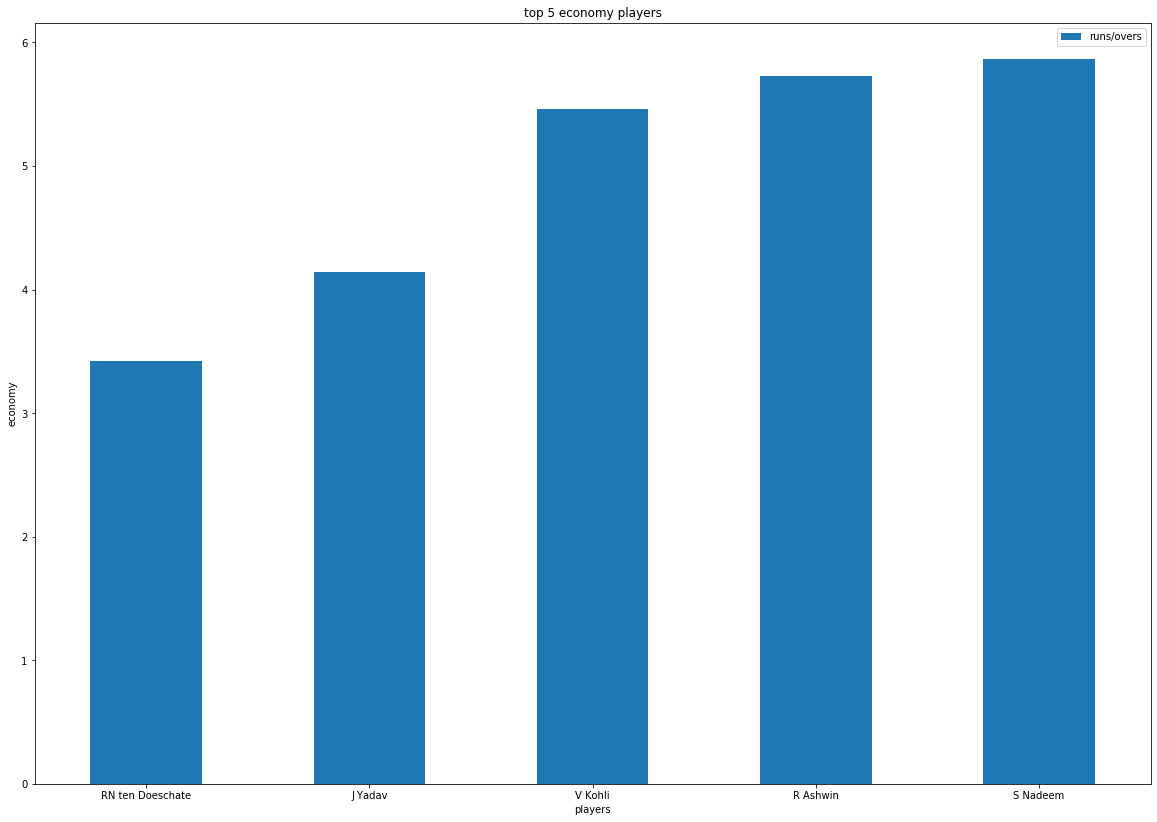

In [406]:
ax = dfff.head().plot.bar(y='runs/overs', rot=0, figsize=(20,14))

plt.xlabel("players")
plt.ylabel("economy")
plt.title("top 5 economy players")
plt.show()

In [407]:
#matches are won by toss winners
winner_df = df[df['winner'] == df['toss_winner']]
winner_percentage = (winner_df.shape[0]/df.shape[0])*100
winner_percentage

51.100628930817614